## Library import
- math
- numpy
- matplotlib
- sklearn
- random

In [9]:
import math
from sklearn.cluster import KMeans
from random import randint
import matplotlib.pyplot as plt
import numpy as np

## Function
> distance() -> The function is used to calculate distance between 2 points

In [18]:
def distance(point1, point2):
    return math.sqrt((point2[0]-point1[0])*(point2[0]-point1[0]) + (point2[1]-point1[1])*(point2[1]-point1[1]))

> set_label() -> The function is used to set label for points according to clusters

In [11]:
def set_label(point, clusters, labels):
    distances_to_cluster = []
    for c in clusters:
        dis = distance(point,c)
        distances_to_cluster.append(dis)
    min_distance = min(distances_to_cluster)
    label = distances_to_cluster.index(min_distance)
    labels.append(label)

    return labels

## Declare variables

In [12]:
BLACK  = '#000000'
COLORS = np.array(["red","green","blue","yellow","pink","orange","purple","beige","brown","gray","cyan","magenta"])
labels = []
points = []
clusters = []
# K = int(input("Enter number cluster:"))
K = 3

## Draw points
Draw 100 black points with random coordinates

Add the coordinates of those points to the points array

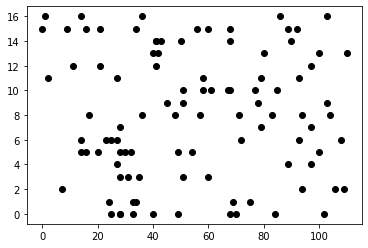

In [13]:
for i in range(100):
    x_random = randint(0,110)
    y_random = randint(0,16)
    points.append([x_random, y_random])
    plt.scatter(x_random, y_random, c = BLACK)

## Draw clusters
Draw K clusters with random coordinates according to the color of the variable COLORS

Add the coordinates of those cluster to the clusters array

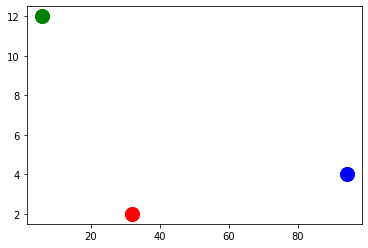

In [14]:
for i in range(K):
    x_cluster = randint(0,110)
    y_cluster = randint(0,16)
    clusters.append([x_cluster,y_cluster])
    plt.scatter(x_cluster, y_cluster, c = COLORS[i], s = 200)

## Function
> draw_points_black() -> Draw points with coordinates with **points** array

> draw_clusters() -> Draw clusters with coordinates with **clusters** array

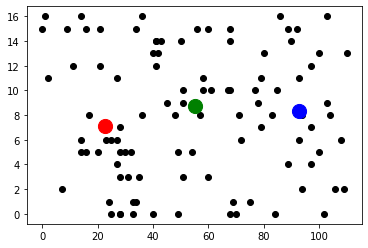

In [19]:
def draw_points_black():
    for i in range(len(points)):
        plt.scatter(points[i][0], points[i][1], c = BLACK)
def draw_clusters():  
    for j in range(len(clusters)):
        plt.scatter(clusters[j][0], clusters[j][1], c = COLORS[j], s = 200)
draw_points_black()
draw_clusters()

## Problem solving (C1)
1. Set label for points
2. Check if the labels of those points are the same as the locations of the clusters. If the same, add the total distance in x and y coordinates
3. Calculate new coordinates for clusters by **total-distance/points**
4. Draw new clusters
5. Draw points in the same colors with clusters according to the position of the label

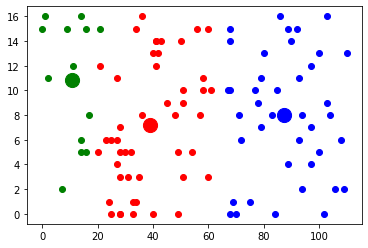

In [16]:
for p in points:
    labels = set_label(p, clusters, labels)
for i in range(K):
    sum_x = 0
    sum_y = 0
    count = 0
    for j in range(len(points)):
        if labels[j] == i:
            sum_x += points[j][0]
            sum_y += points[j][1]
            count += 1
    if count != 0:
        new_cluster_x = sum_x/count
        new_cluster_y = sum_y/count
        clusters[i] = [new_cluster_x,new_cluster_y]

draw_clusters()
for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c = COLORS[labels[i]])

## Used library (C2)
1. Used kmean library
2. *kmeans.cluster_centers_*: get new coordinates between points
3. *kmeans.labels_*: get new labels by clusters
4. Draw again

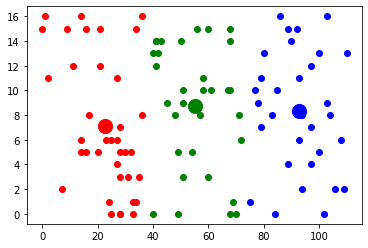

In [17]:
#Library
kmeans   = KMeans(n_clusters=K).fit(points)
clusters = kmeans.cluster_centers_
labels   = kmeans.labels_
draw_clusters()
for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c = COLORS[labels[i]])